
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def show_np_scalars_without_type():
    from IPython import get_ipython
    formatter = get_ipython().display_formatter.formatters['text/plain']
    formatter.for_type(np.float64, lambda num, p, cycle: p.text(str(float(num))))


show_np_scalars_without_type()

df = sns.load_dataset("tips")

print("Head:"), display(df.head())
print(df["day"].unique()), print()
print("Info:"), display(df.info())
print("Describe:"), display(df.describe())

Head:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

Describe:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


(None, None)

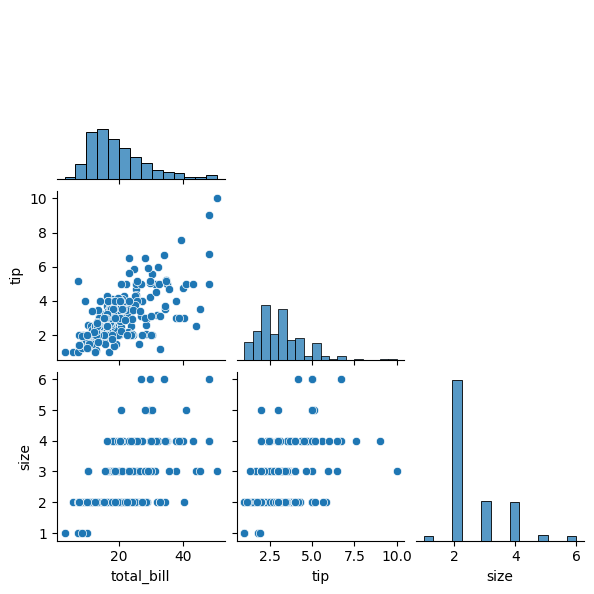

In [27]:
sns.pairplot(df, corner=True, height=2)
plt.show()

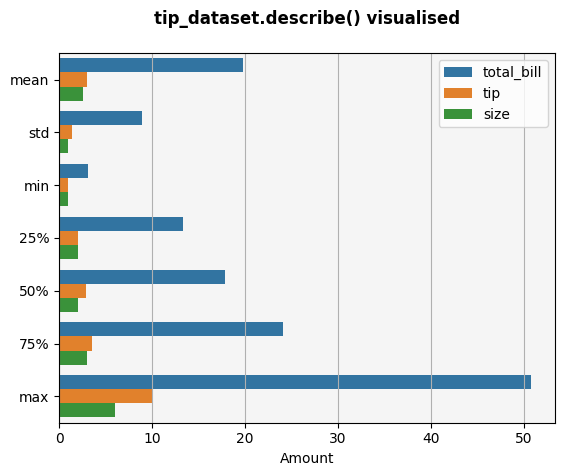

In [28]:
df_describe_T = df.describe().transpose().reset_index()
df_describe_T.drop(columns=["count"], inplace=True)
df_describe_T_melt = df_describe_T.melt(id_vars="index")

sns.barplot(data=df_describe_T_melt, x="value", y="variable", hue="index")
plt.title("tip_dataset.describe() visualised\n", fontweight="bold")
plt.ylabel("")
plt.xlabel("Amount")
plt.legend()
plt.grid(axis="x")
plt.gca().set_facecolor('whitesmoke')
plt.show()

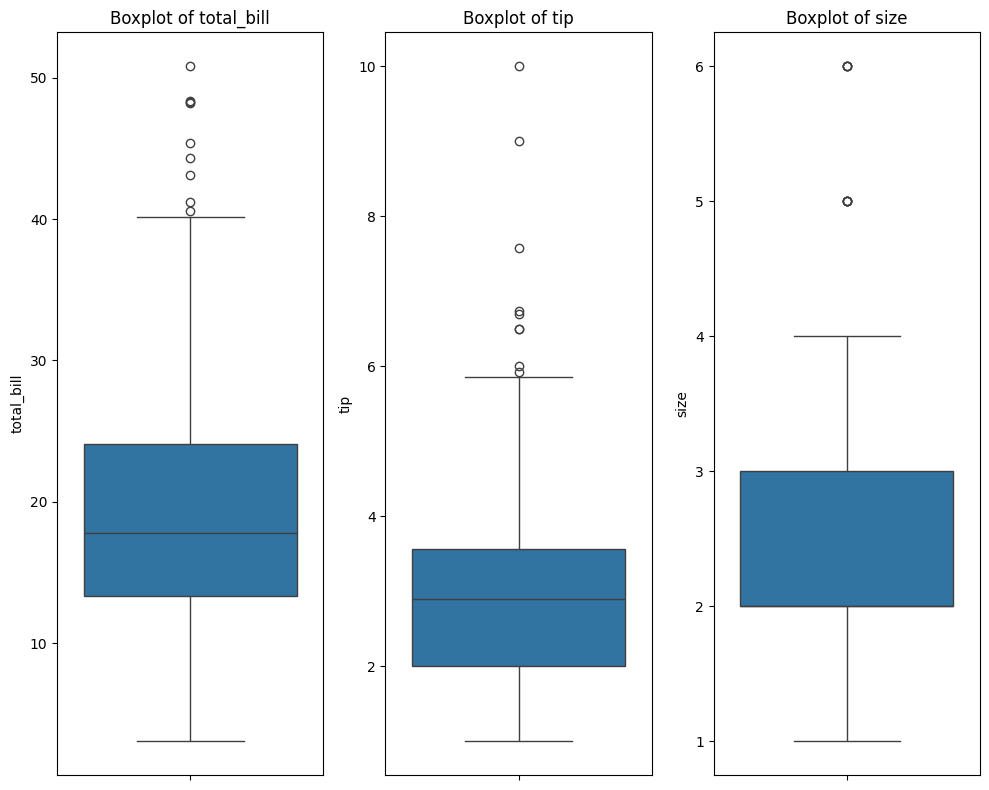

In [29]:
cols_numeric = df.describe().columns.to_list()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

for ax, col in zip(axes, cols_numeric):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

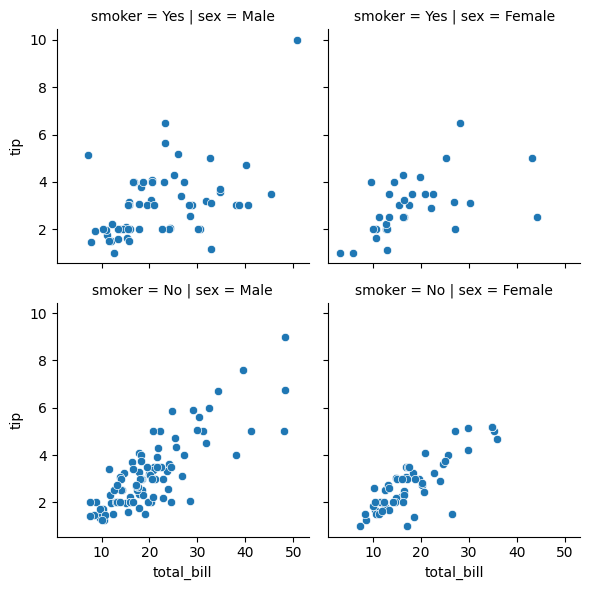

In [30]:
g = sns.FacetGrid(df, col="sex", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

In [31]:
cols_numeric = df.describe().columns.to_list()
cols_categoric = df.drop(columns=cols_numeric)

for col in cols_categoric:
    display(df[col].value_counts().reset_index())

,sex,count
0,Male,157
1,Female,87


,smoker,count
0,No,151
1,Yes,93


,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


,time,count
0,Dinner,176
1,Lunch,68


## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [32]:
from sklearn.model_selection import train_test_split

df_numeric = df[cols_numeric]
X = df_numeric.drop(columns=["tip"])
X = np.array(X)
y = df["tip"]
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [33]:
import time

In [34]:
class Normalise:

    def __init__(self):
        self._train_mean = None
        self._train_std = None


    def norm(self, X, split):
        """Normalise features using training statistics."""
        X_norm = X.copy()
        d = X_norm.shape[1]

        if split == "train":
            self._train_mean = np.mean(X_norm, axis=0)
            self._train_std = np.std(X_norm, axis=0, ddof=1)
        elif split == "test":
            if self._train_mean is None:
                raise ValueError("Normalise the training data first")
        else:
            raise ValueError(f"Unknown split: {split}")

        X_norm = (X_norm - self._train_mean) / self._train_std
            
        return X_norm


normaliser = Normalise()
X_train_norm, X_test_norm = normaliser.norm(X_train, "train"), normaliser.norm(X_test, "test")
X_train_norm[:5, :]

array([[-0.5265122 , -0.6236758 ],
       [ 0.01505431,  1.51824108],
       [ 1.5781121 ,  1.51824108],
       [ 0.54781485,  1.51824108],
       [ 1.9479624 ,  1.51824108]])

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_prime = poly.fit_transform(X_train)
poly_prime = poly.transform(X_test)
poly_double_prime = poly.fit_transform(X_test)

poly_prime.all() == poly_double_prime.all()

np.True_

---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

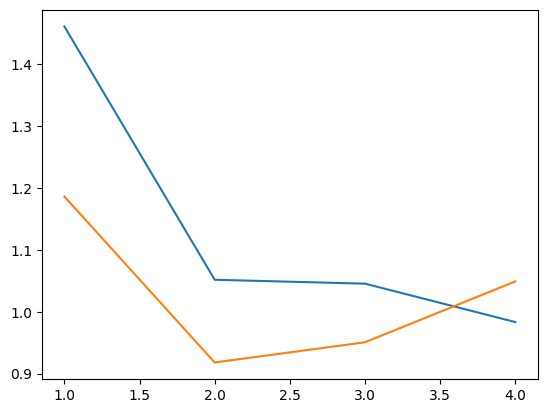

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

rmse = [] # [train, test]

for d in range(4):
    poly = PolynomialFeatures(degree=d)
    X_train_d = poly.fit_transform(X_train)
    X_test_d = poly.transform(X_test)
    linear_model = LinearRegression()
    linear_model.fit(X_train_d, y_train)
    y_hat_train = linear_model.predict(X_train_d)
    y_hat_test = linear_model.predict(X_test_d)
    rmse_train = root_mean_squared_error(y_true=y_train, y_pred=y_hat_train)
    rmse_test = root_mean_squared_error(y_test, y_hat_test)
    rmse.append([rmse_train, rmse_test])

arr = np.array(rmse)
x = np.arange(1,5)
sns.lineplot(x=x, y=arr[:, 0]) # train
sns.lineplot(x=x, y=arr[:, 1]) # test
plt.show()

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---